<a href="https://colab.research.google.com/github/Pravallika-02-datascience/Unsupervised-Machine-Learning-Algorithm/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
Clustering : EastWestAirlines dataset

Steps:
1. Load the dataset (sheet 'data' from EastWestAirlines.xlsx).
2. Preprocess: drop ID column, scale numeric features.
3. Explore optimal k using Elbow and Silhouette methods.
4. Fit K-Means (k=5 by default) and summarize clusters.
5. Perform Hierarchical clustering (Ward linkage); sample if dataset is large.
6. Save plots and CSV summaries for reporting.


"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster



In [2]:
# ---------- 1. Load Data ----------
FILE_PATH = 'EastWestAirlines.xlsx'
SHEET_NAME = 'data'

df = pd.read_excel(FILE_PATH, sheet_name=SHEET_NAME)

In [3]:
# ---------- 2. Preprocess ----------
# Drop ID column
df_cluster = df.drop(columns=['ID#'], errors='ignore')

# Standardize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)
scaled_df = pd.DataFrame(scaled_data, columns=df_cluster.columns)

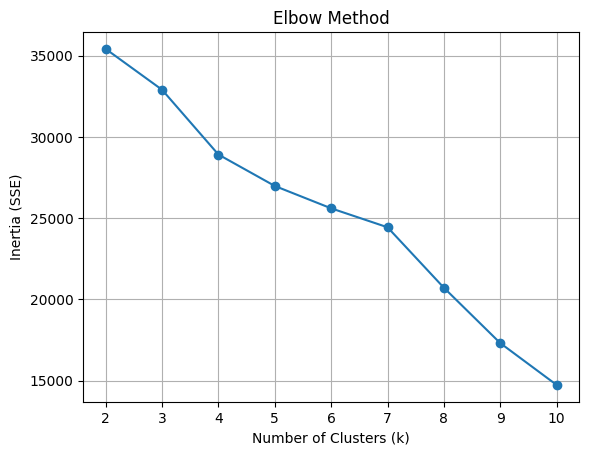

In [6]:
# ---------- 3. Elbow & Silhouette ----------
k_range = range(2, 11)
inertia = []
silhouette_scores = []

for k in k_range:
    kmeans_k = KMeans(n_clusters=k, random_state=42)
    labels_k = kmeans_k.fit_predict(scaled_df)
    inertia.append(kmeans_k.inertia_)
    silhouette_scores.append(silhouette_score(scaled_df, labels_k))

# Elbow Plot
plt.figure()
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.grid(True)
plt.savefig('elbow.png')



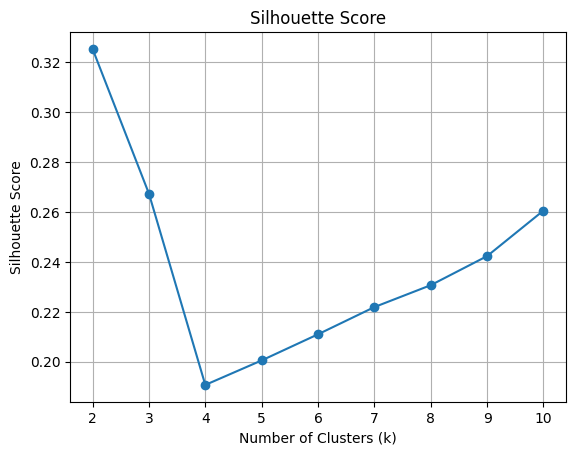

In [5]:
# Silhouette Plot
plt.figure()
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.savefig('silhouette.png')

In [8]:
# ---------- 4. K-Means Clustering ----------
K = 5  # Can be adjusted based on plots
kmeans = KMeans(n_clusters=K, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_df)

# K-Means Summary
kmeans_summary = df.groupby('KMeans_Cluster').mean(numeric_only=True)
kmeans_summary['Count'] = df['KMeans_Cluster'].value_counts()
kmeans_summary.to_csv('kmeans_cluster_summary.csv')



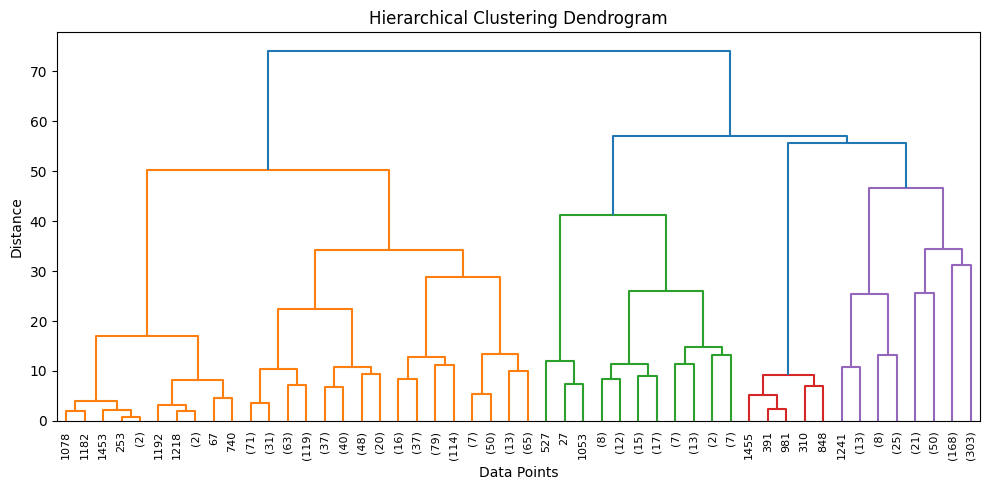

In [9]:
# ---------- 5. Hierarchical Clustering ----------
# Sample if dataset is too large
sample_df = scaled_df if len(scaled_df) <= 1500 else scaled_df.sample(1500, random_state=42)

# Create linkage matrix
Z = linkage(sample_df, method='ward')

# Dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.tight_layout()
plt.savefig('dendrogram.png')

# Assign clusters (same number as K-Means for comparison)
h_labels = fcluster(Z, t=K, criterion='maxclust')

# Assign to DataFrame
if len(sample_df) == len(scaled_df):
    df['HierCluster'] = h_labels
else:
    df['HierCluster'] = np.nan
    df.loc[sample_df.index, 'HierCluster'] = h_labels

# Hierarchical Summary
hier_summary = df.groupby('HierCluster').mean(numeric_only=True)
hier_summary['Count'] = df['HierCluster'].value_counts()
hier_summary.to_csv('hier_cluster_summary.csv')


In [10]:
# ---------- 6. Export Final Dataset ----------
df.to_excel('eastwest_clustered.xlsx', index=False)

print("✅ Clustering analysis complete!")
print("Files generated:")
print("- elbow.png")
print("- silhouette.png")
print("- dendrogram.png")
print("- kmeans_cluster_summary.csv")
print("- hier_cluster_summary.csv")
print("- eastwest_clustered.xlsx")

✅ Clustering analysis complete!
Files generated:
- elbow.png
- silhouette.png
- dendrogram.png
- kmeans_cluster_summary.csv
- hier_cluster_summary.csv
- eastwest_clustered.xlsx
